# Homework 0 (100 points)

**Name and BUID of everyone in your group:** Thomas Lawton U025826989

The goal of this homework is to practice programming in python. This homework is a bit longer than the rest of the homeworks in this course.

**You may NOT use any other libraries other than the ones already imported.** _For clarification, you'll notice some of the question ask for using numpy, and those methods have numpy imported, but you cannot use it anywhere else! Essentially, if it is imported in a certain cell in the notebook, it can only be used in that cell (The code has also been made to follow this idea so you don't have to worry about it; just don't import anything!)_

## Exercise 1 (45 points):

### Implementing Rico's New Company: Joyride

Here you will be practicing object-oriented programming and will touch on a bit of linear algebra.

_Rico recently was inspired by Uber and created his own ride-sharing company called Joyride. This company is like Uber, but only luxury cars are used to pickup and drop off people. Luckily, he has hired you, a CS 506 expert, to help him with his company._

a) (**4 pts**) Create a `Car` class that has the following attributes:

- `car_model` (`CarModel` enum)
- `max_gas_tank` (float, in gallons, the maximum amount of gas the car can hold)
- `current_gas_tank` (float, in gallons, the current amount of gas in the car's gas tank)
- `mpg` (float, miles per gallon, how many miles the car can drive per gallon of gas)
- `cost_per_refill` (float, in dollars, how much it costs to refill the gas tank, which is paid by Joyride)
- `capacity` (int, number of people the car can hold)
- `price_per_mile` (float, in dollars, how much Joyride charges passengers per mile the car has to drive. NOTE that this is independent from number of passengers in the car.)
- `total_miles_driven` (float, in miles, how many miles the car has driven in total)
- `max_miles` (float, in miles, how many miles the car can drive before the car breaks completely and cannot be repaired)
- `purchased_price` (float, in dollars, how much Joyride paid to purchase the car)
- `license_plate` (string, the license plate of the car)

_You may assume the car will never need repairs. However, as `max_miles` attribute suggests, the car will break once it has reached the maximum number of miles and cannot be repaired. Instead, the car will be thrown out and a new car will be bought._

Be sure to include a `__init__` method that takes in the above attributes as parameters and sets them as attributes of the class.

You do not need to include a `__str__` method nor setters and getters methods. Your design choices for the `__init__` method are up to you; no specific design is required.

For your convenience, the `CarModel` enum is defined below and a little bit has been done for you.

In [152]:
# NOTE: Enum class already made for you
from enum import Enum


class CarModel(Enum):
    LEMON_LAMBORGHINI = "Lemon Lamborghini"
    MAYO_MCLAREN = "Mayo McLaren Elva"
    HERSHEY_HENNESSEY = "Hershey Hennessey Venom F5"
    MILKY_MERCEDES = "Milky Mercedes-AMG Project One"
    SALTY_SEVEN = "Salty 777 Hypercar"

class Car:
    def __init__(self, car_model, max_gas_tank: float, current_gas_tank: float, mpg: float, cost_per_refill: float, capacity: int, price_per_mile: float, total_miles_driven: float, max_miles: float, purchased_price: float, license_plate: str):
        self.car_model = car_model
        self.max_gas_tank = max_gas_tank
        self.current_gas_tank = current_gas_tank
        self.mpg = mpg
        self.cost_per_refill = cost_per_refill
        self.capacity = capacity
        self.price_per_mile = price_per_mile
        self.total_miles_driven = total_miles_driven
        self.max_miles = max_miles
        self.purchased_price = purchased_price
        self.license_plate = license_plate  

    def __repr__(self):
        return self.license_plate #NOTE: please use this variable name for your license plate

b) (**4 pts**) As we need to store these cars somewhere, create a `CarGarage` class that has the following attributes:

- `location`: string, stores the name of the city the garage is located in.
- `cars`: list of `Car` objects, stores the cars inside the garage. This list should be empty when the `CarGarage` is initialized.

This class will be used to store the available cars for Joyride drivers. Be sure to include a `__init__` method that takes in the above attributes as parameters and sets them as attributes of the class. **You should also include a setter method for each attribute.**

You do not need to include a `__str__` method nor a `__repr__` method.


In [153]:
from typing import List, Dict, Tuple


class CarGarage:
    def __init__(self, location: str, cars: list):
        self.location = location
        self.cars = cars
        
    def set_location(self, x: str):
        self.location = x
        
    def set_cars(self, x: list):
        self.cars = x

    # NOTE: when working on parts c) - f), you will have to edit this cell to fill in the methods below!

    def add_car_in_garage(self, car: Car) -> None:
        """
        This method adds a car into the list of cars (adds it to the end of the list)
        """
        self.cars.append(car)

    def filter_cars_by_price(self, price_limit: float) -> List[Car]:
        """
        This method will take in the price_limit (price per mile) and will return 
        all cars that are below (or equal to) the price limit (the price per mile).
        The cars list however is not modified in this method.
        """
        return [car for car in self.cars if car.price_per_mile <= price_limit]
        

    def remove_broken_cars(self) -> None:
        """
        This method will remove all cars that are broken from the cars list.
        As defined in part a), a car is broken if it has reached its max_miles.
        """
        self.cars = [car for car in self.cars if car.total_miles_driven < car.max_miles]

    def get_top_car_preferences(
        self, preferences: Dict[str, Tuple[any, int]]
    ) -> List[Car]:
        """
        This method will return the top car preferences based on the preferences dictionary.
        See part f) for a thorough description of how this method should work.
        """
        priority_sorted = sorted(preferences.items(), key=lambda x: x[1][1])
        
        #if cr not in garage return an empty list
        if "car_model" in preferences and not any(car.car_model == preferences["car_model"][0] for car in self.cars):
            return []
        
        # key helper function for sorted()
        def helper (car: Car) -> Tuple:
            distances = []
            for attr, (value, priority) in priority_sorted:
                if attr == "car_model":
                    distances.append(1 if car.car_model == value else 2 )
                else:
                    car_value = getattr(car, attr)
                    distances.append(abs(car_value - value))
            return tuple(distances)
        
        return sorted(self.cars, key = helper)

c) (**3 pts**) Implement the `__add_car_in_garage` method above. This method should take in a `Car` object as a parameter and add it to the `cars` attribute of the `CarGarage` class. Additional description is provided in the docstring. Be sure to write your code in the space provided.

d) (**4 pts**) Implement the `__filter_cars_by_price` method above. This method should take in a `float` as a parameter and return a list of `Car` objects that have a `purchased_price` attribute less than or equal to the parameter. Additional description is provided in the docstring. Be sure to write your code in the space provided.

e) (**5 pts**) Implement the `__remove_broken_cars` method above. This method should remove all cars from the `cars` attribute of the `CarGarage` class that have a `total_miles_driven` attribute greater than or equal to the `max_miles` attribute. Additional description is provided in the docstring. Be sure to write your code in the space provided.

f) **(10 pts)** Implement the `__get_top_car_preferences` method above. This method should take in a `preferences` dictionary and return a sorted list of all the cars, from the most preferred at the start to the least preferred.

An example of the preferences dictionary is:

```python
{
    "car_model": (CarModel.LEMON_LAMBORGHINI, 2),
    "capacity": (4, 1),
    "price_per_mile": (40.25, 3)
}
```

Notice not all fields from the `Car` object are included --- this means that the customer doesn't need to put all fields in their preferences. The preferences are ranked here from 1 to 3, with 1 being the most preferred and 3 being the least preferred (Here, `capacity` has the highest preference and `price_per_mile` has the lowest preference). This also means your code should work for any group of preferences given.

**Clarifying Questions you asked Rico:**

> _"How do I sort if the user put in a number that does not match any car?"_
>
> Let's give an example of this situation. If you have a customer give a preference like
>
> ```python
> {
>     "mpg": 90
> }
> ```
>
> But no car has exactly 90 miles per gallon, you can compute it's distance from the closest car's mpg and sort based on that. For example, if the closest car has 80 mpg, then the distance is 10 since the customer wanted 90 (90-80 = 10). If the closest car has 100 mpg, then the distance is respectively 10. You can then sort based on the distance, where the smaller distance is the more preferred.

> _"What would happen if a user put in a car that does not exist in the `CarGarage`?"_
>
> If this is the case, then the output should be an empty list. This is because the user's preferences cannot be met.

> _"How do I sort the CarModel values? I can't just sort the enum values."_
>
> In this situation, do the following: If the CarModel is the exact CarModel that is given in the preference, assign it a number like 1. For all the other CarModels that do not match the one in the preferences, assign them a bigger number like 2. Then, sort based on the number you assigned to each CarModel. This way, the CarModel that matches the preference will be sorted first.

> _"I'm not sure how to sort the cars based on multiple preferences in python, how do I do this?"_
>
> You can manipulate the `lambda` feature from Worksheet 0.
> You are welcome to ask ChatGPT about it or use this link: https://www.geeksforgeeks.org/sort-a-list-of-objects-by-multiple-attributes-in-python/.

> _"Do I consider tie-breakers?"_
>
> Nope! Don't worry about tie-breakers. If two cars have the same distance from the customer's preference, then you can just put them in any order. Similarly, if two cars have the same exact values for each field, then you can put them in any order as well.

>_"Can you give a basic example?"_
> Sure, consider this preferences dictionary:
>
> ```python
> {
>     "car_model": (CarModel.LEMON_LAMBORGHINI, 2),
>     "capacity": (4, 1),
> }
> ```
>
> Here, `capacity` is more important (priority 1) than `car_model`. To sort this, look at a given car list and see which ones are closest to capacity of 4. Then, if there is a tie, look at the `car_model`.
### Analyzing Profits

Now that Rico has his garage all ready and set up, he decides to write an application to be on the show Shark Tank in hopes of getting money from investors to make his business idea a reality. Below is a `SharkTankApplication` _interface_ that has the following attributes:

- `company_name`: string, the name of the company
- `num_employeees`: int, the number of employees that work for the company
- `factories`: list of any type, the factories the company owns. (Note in the context of Joyride this will be a list of `CarGarage` objects)
- `total_profit`: float, the total profit the company has made since it started. This is calculated by the `__calculate_total_profit` method.
- `equity`: float, the percentage of the company Rico is willing to give up to the investors
- `pitch_score`: float, a percentage score that the judges will use to determine if they want to invest in the company. This score is calculated by the `__calculate_pitch_score` method.

In [154]:
# NOTE: ****DO NOT EDIT THIS CELL*****

# This is the SharkTankApplication interface.

import abc  # abstract base class
from typing import List

class SharkTankApplication(abc.ABC):
    def __init__(
        self, company_name: str, num_employees: int, factories: List[any], equity: float
    ):
        self.company_name = company_name
        self.num_employees = num_employees
        self.factories = factories
        self.equity = equity
        self.total_profit = self.calculate_total_profit()
        self.pitch_score = self.calculate_pitch_score()

    @abc.abstractclassmethod
    def calculate_pitch_score(self) -> float:
        """
        This method will compute the pitch score of the company.
        Each company will compute pitch score differently, so
        this method is abstract.
        """
        pass

    @abc.abstractclassmethod
    def calculate_total_profit(self) -> float:
        """
        This method will compute the revenue of the store by only
        looking at all the sold items' profit. However, each store
        will compute revenue differently, so this method is abstract.
        """
        pass

Rico will have his own application, which is a `JoyrideApplication` class. This class will inherit from the `SharkTankApplication` class. You will have to implement the methods that are not implemented: `__calculate_pitch_score` and `__calculate_total_profit`.

However, do notice two added fields that are in the `SharkTankApplication` interface:

- `customer_dissatisfaction`: float, a number between 0 and 5 that represents what percentage of customers are unsatisfied, rated by customers (0 is best, 5 is worst).
- `employee_retention_rate`: float, a number between 0 and 1 that represents what percent of employees stay in the company (per year).

In [155]:
# NOTE: when working on parts g) - h), you will have to edit this cell to fill in the methods!
from typing import List


class JoyrideApplication(SharkTankApplication):
    """
    This class represents a Joyride Application.

    There are two new fields:
    - company_rating: float (rating between 0 and 1, where 1 is the best)
    - employee_retention_rate: float (rating between 0 and 1, where 1 is 100%)
    """

    def __init__(
        self,
        company_name: str,
        num_employees: int,
        factories: List[CarGarage],
        equity: float,
        customer_dissatisfaction: float,  # new field
        employee_retention_rate: float,  # new field
    ) -> None:
        self.customer_dissatisfaction = customer_dissatisfaction
        self.employee_retention_rate = employee_retention_rate
        super().__init__(company_name, num_employees, factories, equity)


    def calculate_pitch_score(self) -> float:
        """
        This method will compute the pitch score of the company.
        For more information on how to compute the pitch score,
        see part g).
        """
        # dot product between v and w
        dot = (self.equity * self.customer_dissatisfaction) + (self.total_profit * self.employee_retention_rate)
        
        #magnitude v
        mag_v = (self.equity**2 + self.total_profit**2)**(1/2)
        
        #magnitude w
        mag_w = (self.customer_dissatisfaction**2 + self.employee_retention_rate**2)**(1/2)
        
        return abs(dot) / (mag_v * mag_w)

    def calculate_total_profit(self) -> float:
        """
        This method will compute the revenue of the store by only
        looking at all the sold items' profit. For more information
        on how to compute the revenue, see part h).
        """
        
        rev = 0
        cost = 0
        
        #employee cost
        cost += self.num_employees*10000
        
        #cost and profit for every car in every garage
        for car_garage in self.factories:
            for car in car_garage.cars:
                cost += car.purchased_price + (car.total_miles_driven/car.mpg)//(car.max_gas_tank) * car.cost_per_refill
                rev += car.total_miles_driven * car.price_per_mile
        
        return rev-cost

    # NOTE: do not edit this method!
    def __str__(self) -> str:
        return "Company Joyride"

g) **(5 pts)** Implement the `calculate_pitch_score` method above. This method should return a float between 0 and 1 that represents the pitch score of the company. The pitch score is calculated by the following formula (inspired from cosine similarity):

$$
\vec{v} = <\text{equity}, \text{total profit}>
$$

$$
\vec{w} = <\text{customer dissatisfaction}, \text{employee retention rate}>
$$

$$
\text{pitch score} = \frac{|\vec{v} \cdot \vec{w}|}{||\vec{v}|| \cdot ||\vec{w}||}
$$

h) (**10 pts**) Implement the `calculate_total_profit` method above. This method should return a float that represents the total profit the company has made since it started. The total profit is computed by summing up the revenue for each car in each factory. To compute this, note the following:

- Each car has a `total_miles_driven` attribute that represents how many miles the car has driven in total.
- Each car has a `price_per_mile` attribute that represents how much Joyride charges passengers per mile the car has to drive.
- Each car has a `cost_per_refill` attribute that represents how much it costs to refill the gas tank.
- Each car has a `purchase_price` attribute that represents how much Joyride paid to purchase the car.
- Each car has a `mpg` attribute that represents how many miles the car can drive per gallon of gas.
- Each employee gets paid $10,000 (don't worry about how often).

You can assume the following:

- The car's gas is only refilled when the car hits 0 gallons of gas (don't worry about partial refills).
- Each employee got a total of $10,000 and none of their salaries are different from one another.
- Don't worry about the cost of gas changing over time.
- Don't worry about broken cars; there is no need to filter those out (we need them so we can track profit here).
- Rico's salary is not included in the total profit (so just use `num_employees` and don't adjust that number)

Be sure to write your code in the space provided above.

### Debugging Your Code (Non-hidden tests)

Run the following code to ensure your code works properly. Half the test cases' expected output are not shown here, but will be used to grade your code, as you will see in the next section.

In [156]:
adesanya_car = Car(
    CarModel.LEMON_LAMBORGHINI,
    max_gas_tank=40,
    current_gas_tank=23,
    mpg=70,
    cost_per_refill=30,
    capacity=6,
    price_per_mile=650,
    total_miles_driven=9045.35,
    max_miles=10000,
    purchased_price=1200000,
    license_plate="ADESAN1",
)

jones_car = Car(
    CarModel.MAYO_MCLAREN,
    max_gas_tank=40,
    current_gas_tank=30,
    mpg=60,
    cost_per_refill=23.4,
    capacity=2,
    price_per_mile=500,
    total_miles_driven=10500,
    max_miles=100000,
    purchased_price=1000000,
    license_plate="JONESBONE",
)

ngannou_car = Car(
    CarModel.HERSHEY_HENNESSEY,
    max_gas_tank=50,
    current_gas_tank=50,
    mpg=50,
    cost_per_refill=10.53,
    capacity=2,
    price_per_mile=400,
    total_miles_driven=10000,
    max_miles=10000,
    purchased_price=800000,
    license_plate="PREDA7OR",
)

strickland_car = Car(
    CarModel.MILKY_MERCEDES,
    max_gas_tank=130,
    current_gas_tank=10,
    mpg=10,
    cost_per_refill=50,
    capacity=4,
    price_per_mile=3000,
    total_miles_driven=101.3,
    max_miles=10000,
    purchased_price=850000,
    license_plate="BASURA",
)

elon_musk_car = Car(
    CarModel.SALTY_SEVEN,
    max_gas_tank=100,
    current_gas_tank=100,
    mpg=100,
    cost_per_refill=90.37,
    capacity=6,
    price_per_mile=3000.49,
    total_miles_driven=19284,
    max_miles=60000,
    purchased_price=4000000,
    license_plate="X Æ A-12",
)

rico_car = Car(
    CarModel.SALTY_SEVEN,
    max_gas_tank=120,
    current_gas_tank=20,
    mpg=200,
    cost_per_refill=100.5,
    capacity=4,
    price_per_mile=1400.99,
    total_miles_driven=25,
    max_miles=25000,
    purchased_price=1250000,
    license_plate="ELRICO",
)

las_vegas_garage = CarGarage(
    "Las Vegas", [adesanya_car, jones_car, ngannou_car, strickland_car]
)
miami_garage = CarGarage("Miami", [elon_musk_car])
miami_garage.add_car_in_garage(rico_car)

# TESTING 1C
def verify_1c():
    try: 
        assert (
            len(miami_garage.cars) == 2
        )
    except AssertionError:
        print(f"1C: add_car_in_garage() failed, outputted {len(miami_garage.cars)} cars instead of 2")

# TESTING 1D
def verify_1d():
    try:
        filtered_cars = las_vegas_garage.filter_cars_by_price(648)
        assert (
            len(filtered_cars) == 2
        )
    except AssertionError:
        print(f"1D: filter_cars_by_price() failed, outputted {len(filtered_cars)} cars instead of 2")

# TESTING 1E
def verify_1e():
    try:
        las_vegas_garage.remove_broken_cars()
        assert (
            len(las_vegas_garage.cars) == 3
        )
        # adding it back since we need to compute profit for later
        las_vegas_garage.add_car_in_garage(ngannou_car)
    except AssertionError:
        print(f"1E: remove_broken_cars() failed, outputted {len(las_vegas_garage.cars)} cars instead of 3")

# TESTING 1F
def verify_1f():
    try:
        preferences_1 = {
            "car_model": (CarModel.SALTY_SEVEN, 2),
            "max_gas_tank": (100, 3),
            "mpg": (100, 4),
            "cost_per_refill": (90.37, 5),
            "capacity": (4, 1),
            "max_miles": (60000, 6),
        }

        sorted_cars_1 = las_vegas_garage.get_top_car_preferences(preferences_1)
        assert (
            len(sorted_cars_1) == 0
        ), f"1F: get_top_car_preferences() failed preference_1, outputted {sorted_cars_1} instead of empty list"
        
        preferences_2 = {
            "car_model": (CarModel.MILKY_MERCEDES, 2),
            "max_gas_tank": (100, 3),
            "mpg": (100, 4),
            "cost_per_refill": (90.37, 5),
            "capacity": (4, 1),
            "max_miles": (60000, 6),
        }

        sorted_cars_2 = las_vegas_garage.get_top_car_preferences(preferences_2)
        assert (
            sorted_cars_2[0].license_plate == "BASURA"
            and sorted_cars_2[1].license_plate == "PREDA7OR"
            and sorted_cars_2[2].license_plate == "ADESAN1"
            and sorted_cars_2[3].license_plate == "JONESBONE"
        ), f"1F: get_top_car_preferences() failed preference_2, outputted: {sorted_cars_2}"
    except AssertionError as err:
        print(err)

# TESTING 1G AND 1H

joyride_application = JoyrideApplication(
    company_name="Joyride",
    num_employees=2400,
    factories=[las_vegas_garage, miami_garage],
    equity=0.2,
    customer_dissatisfaction=1.25,
    employee_retention_rate=0.9,
)

def verify_1g():
    import math
    try:
        assert math.isclose(
            joyride_application.pitch_score, 0.584304729, abs_tol=0.00001
        )
    except AssertionError:
        print(f"1G: calculate_pitch_score() failed, outputted {joyride_application.pitch_score} instead of 0.584304729")

def verify_1h():
    import math
    try:
        assert math.isclose(
            joyride_application.total_profit, 40229535.32, abs_tol = 0.01
        )
    except AssertionError:
        print(f"1H: calculate_total_profit() failed, outputted {joyride_application.total_profit} instead of 40229839.41")

verify_1c()
verify_1d()
verify_1e()
verify_1f()
verify_1g()
verify_1h()
print("If nothing else is printed besides this, all non-hidden test cases passed (except the unknown ones to be used in grading) for question 1!") 

If nothing else is printed besides this, all non-hidden test cases passed (except the unknown ones to be used in grading) for question 1!


### Testing Your Code: Graded (Hidden) Tests

**Note that if you don't end up having the right answers, partial credit will be rewarded based on your effort and how much was done.**

**Run the cell below and leave the output in your submission. Failure to do so will result in lost points for correctness.**

In [157]:
car1 = Car(CarModel.MAYO_MCLAREN, 80, 40, 150, 75.0, 3, 1100.0, 25, 24000, 900000, "CSTM313")
car2 = Car(CarModel.LEMON_LAMBORGHINI, 100, 50, 150, 75.0, 5, 1200.0, 30, 20000, 800000, "ABC123")
car3 = Car(CarModel.SALTY_SEVEN, 80, 40, 180, 90.0, 4, 1100.0, 35, 22000, 900000, "XYZ789")
car4 = Car(CarModel.HERSHEY_HENNESSEY, 110, 60, 220, 110.0, 5, 1600.0, 45, 18000, 1500000, "CAR456")
car5 = Car(CarModel.MILKY_MERCEDES, 70, 30, 130, 65.0, 4, 900.0, 20, 25000, 600000, "CAR789")
car6 = Car(CarModel.MAYO_MCLAREN, 95, 55, 190, 95.0, 5, 1400.0, 40, 21000, 1200000, "LX123")
car7 = Car(CarModel.MAYO_MCLAREN, 85, 45, 170, 85.0, 4, 1000.0, 25, 23000, 700000, "ECO456")
car8 = Car(CarModel.MAYO_MCLAREN, 120, 70, 240, 120.0, 2, 1800.0, 50, 16000, 2000000, "SPRT789")
car9 = Car(CarModel.MILKY_MERCEDES, 90, 50, 160, 80.0, 4, 1100.0, 30, 22000, 1100000, "HBRD101")
car10 = Car(CarModel.LEMON_LAMBORGHINI, 60, 20, 100, 50.0, 2, 700.0, 10, 30000, 500000, "CLSC202")
car11 = Car(CarModel.LEMON_LAMBORGHINI, 75, 35, 140, 70.0, 4, 950.0, 22, 26000, 800000, "HATCH303")
car12 = Car(CarModel.SALTY_SEVEN, 100, 50, 180, 90.0, 7, 1300.0, 38, 21000, 1400000, "SUV404")
car13 = Car(CarModel.HERSHEY_HENNESSEY, 110, 60, 200, 100.0, 5, 1500.0, 42, 19000, 1600000, "PICK505")
car14 = Car(CarModel.SALTY_SEVEN, 80, 40, 160, 80.0, 8, 1200.0, 28, 24000, 1000000, "VAN606")
car15 = Car(CarModel.SALTY_SEVEN, 105, 65, 220, 110.0, 2, 1700.0, 48, 17000, 1800000, "CNVRT707")
car16 = Car(CarModel.LEMON_LAMBORGHINI, 65, 25, 120, 60.0, 2, 800.0, 15, 28000, 400000, "MINI808")
car17 = Car(CarModel.MILKY_MERCEDES, 120, 70, 200, 100.0, 10, 2200.0, 55, 15000, 2200000, "LIMO909")
car18 = Car(CarModel.LEMON_LAMBORGHINI, 90, 50, 170, 85.0, 6, 1400.0, 40, 20000, 1300000, "TRCK010")
car19 = Car(CarModel.HERSHEY_HENNESSEY, 110, 60, 250, 120.0, 5, 1000.0, 32, 18000, 1700000, "ELEC111")
car20 = Car(CarModel.HERSHEY_HENNESSEY, 100, 55, 190, 95.0, 4, 1600.0, 36, 22000, 1900000, "CSTM212")
car21 = Car(CarModel.LEMON_LAMBORGHINI, 95, 45, 180, 90.0, 4, 1200.0, 28, 22000, 1000000, "AAA001")
car22 = Car(CarModel.MILKY_MERCEDES, 85, 40, 170, 85.0, 5, 1100.0, 25, 24000, 900000, "WHO002")
car23 = Car(CarModel.HERSHEY_HENNESSEY, 105, 50, 190, 95.0, 4, 1300.0, 32, 21000, 1200000, "CCC003")
car24 = Car(CarModel.SALTY_SEVEN, 110, 60, 200, 100.0, 6, 1500.0, 36, 20000, 1500000, "DDD004")
car25 = Car(CarModel.MAYO_MCLAREN, 75, 35, 160, 80.0, 4, 1000.0, 22, 26000, 800000, "EEE005")
car26 = Car(CarModel.LEMON_LAMBORGHINI, 100, 50, 190, 95.0, 5, 1400.0, 30, 22000, 1100000, "AAA006")
car27 = Car(CarModel.MILKY_MERCEDES, 90, 45, 180, 90.0, 7, 1200.0, 38, 19000, 1300000, "BBB007")
car28 = Car(CarModel.HERSHEY_HENNESSEY, 120, 70, 220, 110.0, 5, 1600.0, 42, 18000, 1600000, "CCC008")
car29 = Car(CarModel.SALTY_SEVEN, 70, 30, 140, 70.0, 4, 900.0, 20, 25000, 700000, "DDD009")
car30 = Car(CarModel.MAYO_MCLAREN, 110, 55, 200, 100.0, 2, 1800.0, 48, 17000, 1800000, "EEE010")
car31 = Car(CarModel.LEMON_LAMBORGHINI, 80, 40, 170, 85.0, 8, 1300.0, 45, 20000, 1400000, "AAA011")
car32 = Car(CarModel.MILKY_MERCEDES, 105, 50, 190, 95.0, 4, 1400.0, 36, 21000, 1200000, "BBB012")
car33 = Car(CarModel.HERSHEY_HENNESSEY, 95, 45, 180, 90.0, 6, 1100.0, 32, 22000, 1000000, "CCC013")
car34 = Car(CarModel.SALTY_SEVEN, 115, 55, 210, 105.0, 5, 1500.0, 40, 19000, 1300000, "DDD014")
car35 = Car(CarModel.MAYO_MCLAREN, 70, 35, 150, 75.0, 4, 1000.0, 28, 24000, 900000, "EEE015")
car36 = Car(CarModel.LEMON_LAMBORGHINI, 100, 60, 200, 100.0, 6, 1400.0, 38, 18000, 1500000, "AAA016")
car37 = Car(CarModel.MILKY_MERCEDES, 90, 45, 180, 90.0, 5, 1200.0, 35, 20000, 1200000, "BBB017")
car38 = Car(CarModel.HERSHEY_HENNESSEY, 110, 65, 220, 110.0, 4, 1600.0, 42, 17000, 1700000, "CCC018")
car39 = Car(CarModel.SALTY_SEVEN, 75, 35, 160, 80.0, 2, 900.0, 18, 26000, 700000, "DDD019")
car40 = Car(CarModel.MAYO_MCLAREN, 120, 70, 240, 120.0, 4, 1800.0, 48, 16000, 1900000, "EEE020")

garage1 = CarGarage("Garage 1", [car1, car2, car3, car4, car5])
garage2 = CarGarage("Garage 2", [car6, car7, car8, car9, car10])
garage3 = CarGarage("Garage 3", [car11, car12, car13, car14, car15, car16, car17, car18, car19, car21, car22, car23, car24, car25, car26, car27, car28, car29, car30, car31, car32, car33, car34, car35, car36, car37, car38, car39, car40])

# TESTING 1C
garage3.add_car_in_garage(car20)

# TESTING 1D
print("D", garage3.filter_cars_by_price(1000))

# TESTING 1E
garage3.remove_broken_cars()

# TESTING 1F
preferences_1 = {
    "car_model": (CarModel.MAYO_MCLAREN, 3),
    "max_gas_tank": (100, 3),
    "mpg": (100, 1),
    "cost_per_refill": (90.37, 5),
    "capacity": (4, 2),
    "max_miles": (60000, 6),
}

top_car_preferences = garage3.get_top_car_preferences(preferences_1)
formatted_preferences = '\n'.join([' '.join([str(car) for car in top_car_preferences[i:i+5]]) for i in range(0, len(top_car_preferences), 5)])
print("F", formatted_preferences)

# TESTING 1G AND 1H

joyride_application = JoyrideApplication(
    company_name="Joyride",
    num_employees=25195,
    factories=[garage1, garage2, garage3],
    equity=0.4,
    customer_dissatisfaction=2.05,
    employee_retention_rate=0.6,
)

print("G", joyride_application.pitch_score)
print("H", joyride_application.total_profit)

D [HATCH303, MINI808, ELEC111, EEE005, DDD009, EEE015, DDD019]
F MINI808 HATCH303 DDD009 EEE015 EEE005
DDD019 VAN606 WHO002 TRCK010 AAA011
AAA001 BBB017 CCC013 SUV404 BBB007
CSTM212 CCC003 BBB012 AAA006 PICK505
EEE010 AAA016 DDD004 LIMO909 DDD014
CCC018 CCC008 CNVRT707 EEE020 ELEC111
G 0.2808987519871482
H -299084900.0


## Exercise 2 (55 Points)

In this exercise we will be writing a sudoku solver.

a) Similarly to how we defined classes above, define the sudoku board using a `Board` class comprised of nine rows of nine elements. Write a `repr` method to print the board neatly to the command line. Print an empty board. We can represent empty spaces as zeros. **-5pts**

In [158]:
import numpy as np

class Board:
    def __init__(self):
        self.board = np.zeros((9, 9), dtype=int)

    def __repr__(self):
        rows = []
        for i in range(9):
            if i % 3 == 0:
                rows.append('-'*25)
            row = "| "
            for j in range(9):
                row += str(self.board[i, j]) + " "
                if (j + 1) % 3 == 0:
                    row += "| "
            rows.append(row.strip())
            
        rows.append('-' * 25)
        return '\n'.join(rows)


sudoku = Board()
print(sudoku)

-------------------------
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
-------------------------
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
-------------------------
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
| 0 0 0 | 0 0 0 | 0 0 0 |
-------------------------


b) In the `Board` class above, write getter and setter methods. **-5pts**

`Board` class should have:

- `get_col` to get a specified column of the board.
- `get_row` to get a specified row of the board.
- `set_row` to set a specified row of the board.
- `get_elm` to get an element at a particular row and column.
- `set_elm` to set an element at a particular row and column.
- `get_box` to get the box containing a (row, col) location.

In [162]:
# your code here
class Board:
    def __init__(self):
        self.board = np.zeros((9, 9), dtype=int)

    def __repr__(self):
        rows = []
        for i in range(9):
            if i % 3 == 0:
                rows.append('-'*25)
            row = "| "
            for j in range(9):
                row += str(self.board[i, j]) + " "
                if (j + 1) % 3 == 0:
                    row += "| "
            rows.append(row.strip())
            
        rows.append('-' * 25)
        return '\n'.join(rows)

    def get_col(self, c):
        return self.board[:, c]

    def get_row(self, r):
        return self.board[r]

    def set_row(self, r, row_val):
        self.board[r] = row_val

    def get_elm(self, r, c):
        return self.board[r, c]

    def set_elm(self, r, c, val):
        self.board[r, c] = val
    
    def get_box(self, r, c):
        box_r = (r // 3) * 3
        box_c = (c // 3) * 3
        return self.board[box_r:box_r+3, box_c:box_c+3]

c) Define and print the following sudoku. **-5pts**

In [160]:
from IPython.display import Image
Image(filename="sudoku.jpg", width=300, height=300)

FileNotFoundError: [Errno 2] No such file or directory: 'sudoku.jpg'

In [163]:

sudoku = Board()
sudoku.set_row(0, [2,6,0,0,7,0,4,8,3])
sudoku.set_row(1, [3,1,0,0,0,0,0,0,9])
sudoku.set_row(2, [5,7,0,3,4,0,0,0,2])
sudoku.set_row(3, [1,0,0,0,0,0,9,0,0])
sudoku.set_row(4, [0,8,0,0,9,0,0,3,0])
sudoku.set_row(5, [0,0,7,0,0,0,0,0,5])
sudoku.set_row(6, [7,0,0,0,5,2,0,9,4])
sudoku.set_row(7, [8,0,0,0,0,0,0,5,7])
sudoku.set_row(8, [9,5,6,0,3,0,0,2,1])

print(sudoku)

-------------------------
| 2 6 0 | 0 7 0 | 4 8 3 |
| 3 1 0 | 0 0 0 | 0 0 9 |
| 5 7 0 | 3 4 0 | 0 0 2 |
-------------------------
| 1 0 0 | 0 0 0 | 9 0 0 |
| 0 8 0 | 0 9 0 | 0 3 0 |
| 0 0 7 | 0 0 0 | 0 0 5 |
-------------------------
| 7 0 0 | 0 5 2 | 0 9 4 |
| 8 0 0 | 0 0 0 | 0 5 7 |
| 9 5 6 | 0 3 0 | 0 2 1 |
-------------------------


d) Add to the `Board` class above a method to determine whether a given move at a specified location on the board is legal. Recall in sudoku there can be no repeating integers in the row, column, or box and each element must be an integer between 1 and 9 inclusive. Also, you cannot overwrite elements that are set by the puzzle. For example, in the above sudoku, the top left element is set by the puzzle as "2" and changing that element is invalid. **-10pts**

In [164]:

class Board:
    def __init__(self):
        self.board = np.zeros((9, 9), dtype=int)

    def __repr__(self):
        rows = []
        for i in range(9):
            if i % 3 == 0:
                rows.append('-'*25)
            row = "| "
            for j in range(9):
                row += str(self.board[i, j]) + " "
                if (j + 1) % 3 == 0:
                    row += "| "
            rows.append(row.strip())
            
        rows.append('-' * 25)
        return '\n'.join(rows)

    def get_col(self, c):
        return self.board[:, c]

    def get_row(self, r):
        return self.board[r]

    def set_row(self, r, row_val):
        self.board[r] = row_val

    def get_elm(self, r, c):
        return self.board[r, c]

    def set_elm(self, r, c, val):
        self.board[r, c] = val
    
    def get_box(self, r, c):
        box_r = (r // 3) * 3
        box_c = (c // 3) * 3
        return self.board[box_r:box_r+3, box_c:box_c+3]

    def is_legal(self, r, c, val):
        # if cell filled
        if self.board[r, c] != 0:
            return False
        
        #if number in row
        if val in self.get_row(r):
            return False
        
        #if number in col
        if val in self.get_col(c):
            return False
        
        #if number in box
        if val in self.get_box(r, c):
            return False
        
        return True

In [165]:
sudoku = Board()
sudoku.set_row(0, [2,6,0,0,7,0,4,8,3])
sudoku.set_row(1, [3,1,0,0,0,0,0,0,9])
sudoku.set_row(2, [5,7,0,3,4,0,0,0,2])
sudoku.set_row(3, [1,0,0,0,0,0,9,0,0])
sudoku.set_row(4, [0,8,0,0,9,0,0,3,0])
sudoku.set_row(5, [0,0,7,0,0,0,0,0,5])
sudoku.set_row(6, [7,0,0,0,5,2,0,9,4])
sudoku.set_row(7, [8,0,0,0,0,0,0,5,7])
sudoku.set_row(8, [9,5,6,0,3,0,0,2,1])
sudoku.is_legal(2, 4, 7) # For your testing

False

In [166]:
sudoku.is_legal(0, 2, 2) # For your testing

False

e) Add to the `Board` class a method that searches for solutions uing depth first search and returns the first it finds. Your code should be very similar to the 8 queen problem done in class on 09/18. Here is the breakdown of the algorithm you should implement:

Start with the first row and go through each element of the row from left to right:
- if the element is not set, start by trying the integer 1
- if this is a valid move according to the rules of sudoku, then move on to the next element
- if this is not a valid move then try the next possible integer in ascending order
- if you've tried all possible integers and none are valid moves, then unset the element and backtrack to the previous element. Increment it to the next possible integer. (if that still isn't possible, you should keep backtracking)

When you've explored all elements of a row, move on to the next row. If you reach the end of the board and have a valid sudoku, you have solved the puzzle. If you backtrack all the way to the first (top left) element and there are no valid integers, then the puzzle is impossible.

Test your code on the sudoku from 2 c).

**Note (again):** Your code should follow a very similar pattern as the 8 queen problem we will do in class on 09/18.

**-15pts**

In [167]:

class Board:
    def __init__(self):
        self.board = np.zeros((9, 9), dtype=int)

    def __repr__(self):
        rows = []
        for i in range(9):
            if i % 3 == 0:
                rows.append('-'*25)
            row = "| "
            for j in range(9):
                row += str(self.board[i, j]) + " "
                if (j + 1) % 3 == 0:
                    row += "| "
            rows.append(row.strip())
            
        rows.append('-' * 25)
        return '\n'.join(rows)

    def get_col(self, c):
        return self.board[:, c]

    def get_row(self, r):
        return self.board[r]

    def set_row(self, r, row_val):
        self.board[r] = row_val

    def get_elm(self, r, c):
        return self.board[r, c]

    def set_elm(self, r, c, val):
        self.board[r, c] = val
    
    def get_box(self, r, c):
        box_r = (r // 3) * 3
        box_c = (c // 3) * 3
        return self.board[box_r:box_r+3, box_c:box_c+3]

    def is_legal(self, r, c, val):
        #if cell is filled
        if self.board[r, c] != 0:
            return False
        
        #if number in row
        if val in self.get_row(r):
            return False
        
        #if number in col
        if val in self.get_col(c):
            return False
        
        #if number in box
        if val in self.get_box(r, c):
            return False
        
        return True
    
    def solve(self):
        #loop through all rows and columns
        for row in range(9):
            for col in range(9):
                if self.board[row][col] == 0:  
                    #try numbers 1-9, if not then backtrack
                    for num in range(1, 10):   
                        if self.is_legal(row, col, num):
                            self.board[row][col] = num
                            #recursive call
                            if self.solve():  
                                return True  

                            # If no solution, try another number
                            self.board[row][col] = 0
                            
                    # If no numbers give solution, backtrack to previous cell
                    return False

        return True

In [168]:
sudoku = Board()
sudoku.set_row(0, [2,6,0,0,7,0,4,8,3])
sudoku.set_row(1, [3,1,0,0,0,0,0,0,9])
sudoku.set_row(2, [5,7,0,3,4,0,0,0,2])
sudoku.set_row(3, [1,0,0,0,0,0,9,0,0])
sudoku.set_row(4, [0,8,0,0,9,0,0,3,0])
sudoku.set_row(5, [0,0,7,0,0,0,0,0,5])
sudoku.set_row(6, [7,0,0,0,5,2,0,9,4])
sudoku.set_row(7, [8,0,0,0,0,0,0,5,7])
sudoku.set_row(8, [9,5,6,0,3,0,0,2,1])
sudoku.solve() # For your testing
print(sudoku)

-------------------------
| 2 6 9 | 1 7 5 | 4 8 3 |
| 3 1 4 | 6 2 8 | 5 7 9 |
| 5 7 8 | 3 4 9 | 1 6 2 |
-------------------------
| 1 2 3 | 5 6 7 | 9 4 8 |
| 4 8 5 | 2 9 1 | 7 3 6 |
| 6 9 7 | 4 8 3 | 2 1 5 |
-------------------------
| 7 3 1 | 8 5 2 | 6 9 4 |
| 8 4 2 | 9 1 6 | 3 5 7 |
| 9 5 6 | 7 3 4 | 8 2 1 |
-------------------------


f) Now that you've learned how to solve a Sudoku puzzle, you'd like to create your own puzzles and challenge your friends to solve them. Perhaps, you no longer wish to initialize a puzzle line by line. In this question, you will be provided with the first three rows of a partially populated board, and you need to generate a Sudoku puzzle with 20 to 40 empty cells that need to be filled in (you can choose any number within this range).  **-10 pts**

In [169]:
from IPython.display import Image
Image(filename="customized_board.jpg", height=300, width=300)

FileNotFoundError: [Errno 2] No such file or directory: 'customized_board.jpg'

If you have completed all the steps mentioned above, you should only need to finish the 'generate_sudoku' method. The concept is straightforward: imagine this as a Sudoku puzzle with only the first three rows, and you need to solve it using the solution from part 'e' using backtracking. After you have solved the Sudoku for the board, you need to devise a method to randomly remove some numbers from the board you have just solved. You should aim to remove 20 to 40 items from the solved board by setting them to 0.

In [170]:
import numpy as np
import random


class Board:
    def __init__(self):
        self.board = np.zeros((9, 9), dtype=int)

    def __repr__(self):
        rows = []
        for i in range(9):
            if i % 3 == 0:
                rows.append('-'*25)
            row = "| "
            for j in range(9):
                row += str(self.board[i, j]) + " "
                if (j + 1) % 3 == 0:
                    row += "| "
            rows.append(row.strip())
            
        rows.append('-' * 25)
        return '\n'.join(rows)

    def get_col(self, c):
        return self.board[:, c]

    def get_row(self, r):
        return self.board[r]

    def set_row(self, r, row_val):
        self.board[r] = row_val

    def get_elm(self, r, c):
        return self.board[r, c]

    def set_elm(self, r, c, val):
        self.board[r, c] = val
    
    def get_box(self, r, c):
        box_r = (r // 3) * 3
        box_c = (c // 3) * 3
        return self.board[box_r:box_r+3, box_c:box_c+3]

    def is_legal(self, r, c, val):
        #if cell is filled
        if self.board[r, c] != 0:
            return False
        
        #if number in row
        if val in self.get_row(r):
            return False
        
        #if number in col
        if val in self.get_col(c):
            return False
        
        #if number in box
        if val in self.get_box(r, c):
            return False
        
        return True
    
    def solve(self):
        #loop through all rows and columns
        for row in range(9):
            for col in range(9):
                if self.board[row][col] == 0:  
                    #try numbers 1-9, if not then backtrack
                    for num in range(1, 10):   
                        if self.is_legal(row, col, num):
                            self.board[row][col] = num
                            #recursive call
                            if self.solve():  
                                return True  

                            # If no solution, try another number
                            self.board[row][col] = 0
                            
                    # If no numbers give solution, backtrack to previous cell
                    return False

        return True


    def generate_sudoku(self):
        if not self.solve():
            return False
        else:
            self.solve()
        
        num_cells_removed = random.randint(20, 40)
        for i in range(num_cells_removed):
            row = random.randint(0, 8)
            col = random.randint(0, 8)
            self.board[row][col] = 0
        

sudoku = Board()
sudoku.set_row(0,[3,0,0,0,0,0,0,4,0])
sudoku.set_row(1,[0,7,0,5,0,0,9,0,0])
sudoku.set_row(2,[0,9,6,3,0,0,0,0,0])

sudoku.generate_sudoku()
print(sudoku)

-------------------------
| 0 1 2 | 6 7 9 | 5 4 8 |
| 4 7 8 | 5 1 0 | 9 0 6 |
| 0 9 0 | 3 4 0 | 0 2 0 |
-------------------------
| 1 2 3 | 4 0 6 | 7 8 9 |
| 0 4 5 | 8 9 0 | 2 1 0 |
| 7 0 9 | 0 0 3 | 0 0 0 |
-------------------------
| 0 3 0 | 7 6 5 | 8 9 4 |
| 8 0 4 | 0 0 1 | 6 0 2 |
| 9 0 7 | 2 8 4 | 0 0 1 |
-------------------------


g) You have generated your own Sudoku puzzle and given it to your friends to solve. However, sometimes your friends may come back to you with different solutions. Let's see if we can find a way to generate all the possible solutions given a Sudoku. First, test the program with the Sudoku provided below, and then feel free to test it on the Sudoku you generated! Hint: Similar to 8 queens problem we will cover in the class. **-5pts**

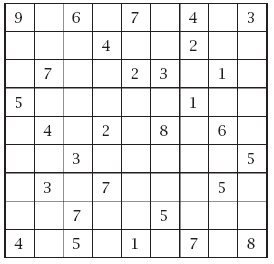

In [ ]:
from IPython.display import Image
Image(filename="bonus.jpg", height=300, width=300)

In [ ]:
import copy
import numpy as np
import random

class Board:
    def __init__(self):
        #TODO: implement this method

    def __repr__(self):
        #TODO: implement this method

    def get_col(self, c):
        #TODO: implement this method

    def get_row(self, r):
        #TODO: implement this method

    def set_row(self, r, row_val):
        #TODO: implement this method

    def get_elm(self, r, c):
        #TODO: implement this method

    def set_elm(self, r, c, val):
        #TODO: implement this method

    def get_box(self, r, c):
        #TODO: implement this method

    def is_legal(self, r, c, val):
        #TODO: implement this method

    def solve(self):
        #TODO: implement this method

    def set_board(self):
        #TODO: implement this method, create the board displayed above

    def generate_sudoku(self):
        # Solve the puzzle first using the method implemented in the previous question.

        # You can specify the number of cells to remove from the solved sudoku.
        # Uncomment the following line and set any number between 20 to 40.
        # num_cells_to_remove = 30

        # Next, choose random locations on the board and set them to 0 if they are not already 0.



# Create a board object and call the solve method to find all solutions
sudoku = Board()
sudoku.set_board()
sudoku.solve()

# Access the solutions in the list
for solution in sudoku.solutions:
    sudoku.board = solution  # Set the board to a solution
    print(sudoku)  # Print the solution
print(f"Total number of solutions: {sudoku.solutionNum}")

 _  _  _  _  _  _  _  _ 
| 9 2 6 | 5 7 1 | 4 8 3 |
| 3 5 1 | 4 8 6 | 2 7 9 |
| 8 7 4 | 9 2 3 | 5 1 6 |
| _ _ _ | _ _ _ | _ _ _ |
| 5 8 2 | 3 6 7 | 1 9 4 |
| 1 4 9 | 2 5 8 | 3 6 7 |
| 7 6 3 | 1 4 9 | 8 2 5 |
| _ _ _ | _ _ _ | _ _ _ |
| 2 3 8 | 7 9 4 | 6 5 1 |
| 6 1 7 | 8 3 5 | 9 4 2 |
| 4 9 5 | 6 1 2 | 7 3 8 |
| _ _ _ | _ _ _ | _ _ _ |
 _  _  _  _  _  _  _  _ 
| 9 2 6 | 5 7 1 | 4 8 3 |
| 3 5 1 | 4 8 6 | 2 7 9 |
| 8 7 4 | 9 2 3 | 5 1 6 |
| _ _ _ | _ _ _ | _ _ _ |
| 5 8 2 | 3 6 7 | 1 9 4 |
| 1 4 9 | 2 5 8 | 3 6 7 |
| 7 6 3 | 1 9 4 | 8 2 5 |
| _ _ _ | _ _ _ | _ _ _ |
| 2 3 8 | 7 4 9 | 6 5 1 |
| 6 1 7 | 8 3 5 | 9 4 2 |
| 4 9 5 | 6 1 2 | 7 3 8 |
| _ _ _ | _ _ _ | _ _ _ |
Total number of solutions: 2


Congratulations! You have completed your first homework. Please wait to receive your grade before adding these small projects to your github - but please do consider adding them to github! If you want to extend it further, it would be a good idea to create a user interface for Sudoku, which would make it a standalone project. You can also research variations of Sudoku and incorporate them into your project. The algorithms we used here, such as DFS and recursion, are very important in various applications and job interviews.

## Bonus (10 points)

No points will be awarded for partial solutions.

A diagonal sudoku is a sudoku with the added constraint that elements on the two main diagonals must not have repeating integers. Copy your Board class below and modify it to solve the diagonal sudoku below. Suggestion: add an optional parameter to your method from 2 e) called is_diag and a new validation method that includes that constraint.

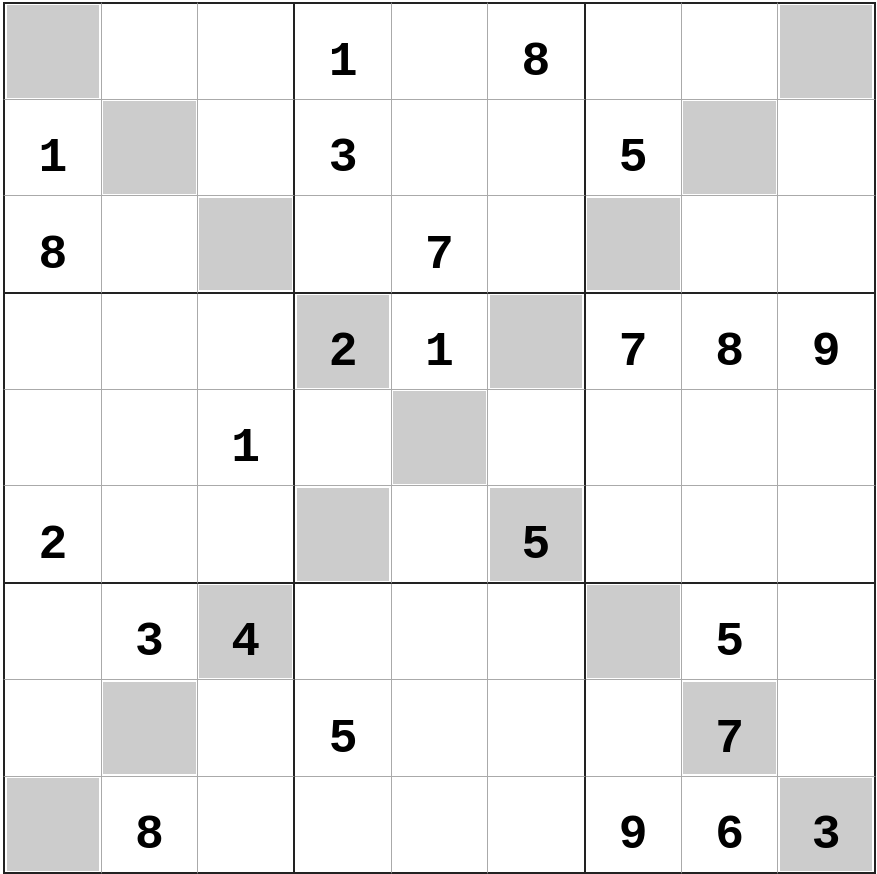

In [1]:
from IPython.display import Image
Image(filename="diagonal_sudoku.png", height=300, width=300)

In [ ]:
# copy the board class from above here

class Board:
    pass